# 📊 E-Commerce Exploratory Data Analysis Using SQL

This project performs data exploration on the Brazilian e-commerce dataset by **Olist** using SQL within a Python environment.  
We analyze orders, customer behavior, reviews, and payments using SQL queries and visualize key patterns using Python.

---

**Dataset Source**: [Kaggle - Brazilian E-Commerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

**Tools Used**:
- Python (pandas, sqlite3)
- SQL
- Matplotlib & Seaborn


In [135]:
import sqlite3
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Step 1: Load CSV Data

We begin by reading all the CSV files provided in the dataset and converting them to pandas DataFrames.


In [3]:
df_customers = pd.read_csv('/content/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/olist_products_dataset.csv')
df_sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
df_product_category_name_translation = pd.read_csv('/content/product_category_name_translation.csv')

## 🗄️ Step 2: Load Data into SQLite Database

Using `sqlite3`, we store all the data into a local SQLite database (`oblist.db`) for running SQL queries.


In [2]:
conn = sqlite3.connect('oblist.db')
c = conn.cursor()

In [18]:
df_customers.to_sql('olist_customers_dataset', conn, if_exists='replace', index=False)

99441

In [19]:
df_geolocation.to_sql('olist_geolocation_dataset', conn, if_exists='replace', index=False)

941597

In [20]:
df_order_items.to_sql('olist_order_items_dataset', conn, if_exists='replace', index=False)

112650

In [21]:
df_order_payments.to_sql('olist_order_payments_dataset', conn, if_exists='replace', index=False)

103886

In [23]:
df_order_reviews.to_sql('olist_order_reviews_dataset', conn, if_exists='replace', index=False)

99224

In [24]:
df_orders.to_sql('olist_orders_dataset', conn, if_exists='replace', index=False)

99441

In [25]:
df_products.to_sql('olist_products_dataset', conn, if_exists='replace', index=False)

32951

In [26]:
df_sellers.to_sql('olist_sellers_dataset', conn, if_exists='replace', index=False)

3095

In [27]:
df_product_category_name_translation.to_sql('product_category_name_translation', conn, if_exists='replace', index=False)

71

In [28]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## 🔍 Step 3: Understand the Schema

We print out the column names of each dataset to get an overview of the available fields for analysis.


In [83]:
print('The columns of olist_customers are :-  ',df_customers.columns)
print('\n')
print('The columns of olist_sellers are :-  ',df_sellers.columns)
print('\n')
print('The columns of olist_order_reviews are :-  ',df_geolocation.columns)
print('\n')
print('The columns of olist_order_items are :-  ',df_order_items.columns)
print('\n')
print('The columns of olist_products are :-  ',df_products.columns)
print('\n')
print('The columns of olist_geolocation are :-  ',df_order_reviews.columns)
print('\n')
print('The columns of product_category_name_translation are :-  ',df_product_category_name_translation.columns)
print('\n')
print('The columns of olist_orders_dataset are :-  ',df_orders.columns)
print('\n')
print('The columns of olist_order_payments are :-  ',df_order_payments.columns)

The columns of olist_customers are :-   Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


The columns of olist_sellers are :-   Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


The columns of olist_order_reviews are :-   Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


The columns of olist_order_items are :-   Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


The columns of olist_products are :-   Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


The columns of olist_geoloc

# **Query 1: Count and % of Orders Purchased in Jan 2018 with 5-Star Review**

In [53]:
c.execute('''
WITH cte AS (
    SELECT COUNT(DISTINCT order_id) AS total_orders
    FROM olist_orders_dataset
    WHERE order_purchase_timestamp BETWEEN '2018-01-01' AND '2018-01-31'
),
cte2 AS (
    SELECT COUNT(DISTINCT ood.order_id) AS count_orders
    FROM olist_orders_dataset AS ood
    JOIN olist_order_reviews_dataset AS ord ON ood.order_id = ord.order_id
    WHERE ood.order_purchase_timestamp BETWEEN '2018-01-01' AND '2018-01-31'
      AND ord.review_score = 5
)
SELECT
    count_orders,
    total_orders,
    ROUND(100.0 * count_orders / total_orders, 2) AS percentage
FROM cte, cte2;
''')

df = pd.DataFrame(c.fetchall(), columns=['orders with 5 star reviews','total orders','percentage'])
display(df)

,orders with 5 star reviews,total orders,percentage
0,3924,7013,55.95


# **Query 2:  Customer purchase trend Year-on-Year**


In [150]:
c.execute('''SELECT strftime('%Y', order_purchase_timestamp) as year,strftime('%m', order_purchase_timestamp) as month,count(distinct customer_id) as cnt
FROM olist_orders_dataset
WHERE order_status ='delivered' and order_delivered_customer_date is not null
GROUP BY year,month
ORDER BY year;''')
df_pivot = df.pivot(index='month', columns='year', values='cnt').fillna(0).astype(int)
df_pivot = df_pivot.sort_index()
display(df_pivot)

year,2016,2017,2018
month,,,
01,0,750,7069
02,0,1653,6555
03,0,2546,7003
04,0,2303,6798
05,0,3545,6749
06,0,3135,6096
07,0,3872,6156
08,0,4193,6351
09,1,4150,0


Text(0.5, 1.0, 'Customer Purchase Trend (Year-on-Year)')

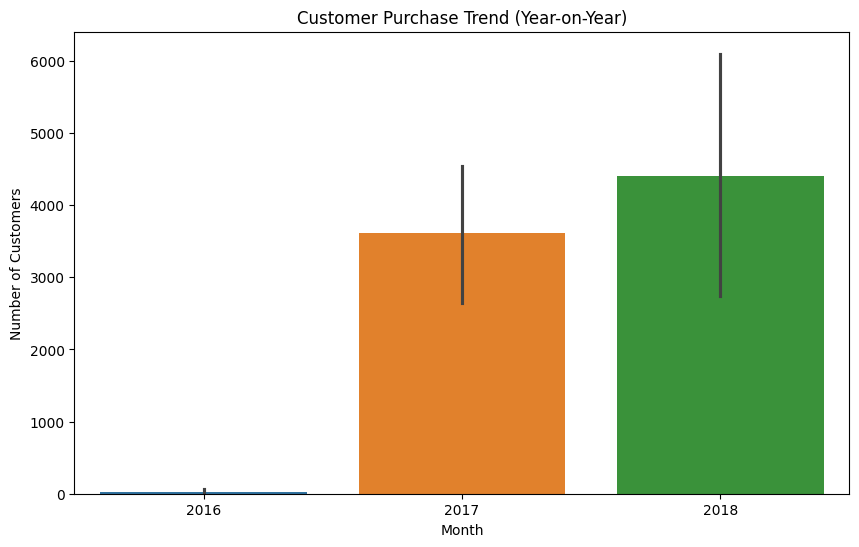

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_pivot)
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer Purchase Trend (Year-on-Year)')

# **Query 3: Average Order Value per Customer**


In [94]:
c.execute('''SELECT customer_id,
ROUND(SUM(olist_order_payments_dataset.payment_value), 2) AS total_spent,
COUNT(DISTINCT olist_order_payments_dataset.order_id) AS num_orders,
ROUND(SUM(olist_order_payments_dataset.payment_value) / COUNT(DISTINCT olist_order_payments_dataset.order_id), 2) AS avg_order_value
FROM olist_order_payments_dataset
JOIN olist_orders_dataset ON olist_order_payments_dataset.order_id = olist_orders_dataset.order_id
GROUP BY customer_id
ORDER BY avg_order_value DESC
LIMIT 10 ;''')
df = pd.DataFrame(c.fetchall(), columns=['customer_id','total_spent','num_orders', 'avg_order_value'])
display(df)

,customer_id,total_spent,num_orders,avg_order_value
0,1617b1357756262bfa56ab541c47bc16,13664.08,1,13664.08
1,ec5b2ba62e574342386871631fafd3fc,7274.88,1,7274.88
2,c6e2731c5b391845f6800c97401a43a9,6929.31,1,6929.31
3,f48d464a0baaea338cb25f816991ab1f,6922.21,1,6922.21
4,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,1,6726.66
5,05455dfa7cd02f13d132aa7a6a9729c6,6081.54,1,6081.54
6,df55c14d1476a9a3467f131269c2477f,4950.34,1,4950.34
7,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,1,4809.44
8,24bbf5fd2f2e1b359ee7de94defc4a15,4764.34,1,4764.34
9,3d979689f636322c62418b6346b1c6d2,4681.78,1,4681.78


# **Query 4: Top 5 Cities with Highest Revenue (2016–2018)**

In [154]:
c.execute('''SELECT
cu.customer_city,
ROUND(SUM(i.price), 2) AS total_revenue
FROM olist_orders_dataset o
JOIN olist_order_items_dataset i ON o.order_id = i.order_id
JOIN olist_customers_dataset cu ON o.customer_id = cu.customer_id
WHERE strftime('%Y', o.order_purchase_timestamp) BETWEEN '2016' AND '2018'
GROUP BY cu.customer_city
ORDER BY total_revenue DESC
LIMIT 5;''')

df = pd.DataFrame(c.fetchall(), columns=['City', 'Total Revenue'])
display(df)

,City,Total Revenue
0,sao paulo,1914924.54
1,rio de janeiro,992538.86
2,belo horizonte,355611.13
3,brasilia,301920.25
4,curitiba,211738.06


Text(0, 0.5, 'Total Revenue')

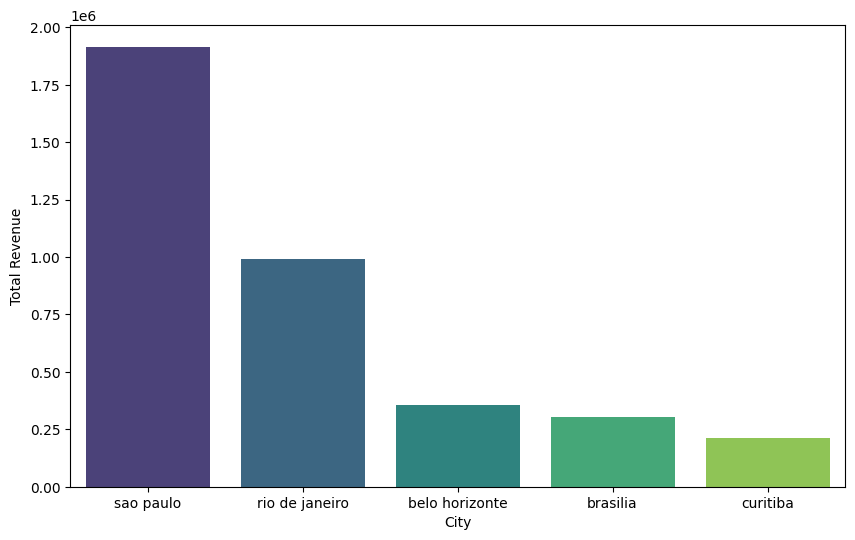

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total Revenue', data=df,palette = 'viridis')
plt.xlabel('City')
plt.ylabel('Total Revenue')

# **Query 5: State-wise Revenue Table (2016–2018)**

In [156]:
c.execute('''SELECT
  cu.customer_state,
  ROUND(SUM(i.price), 2) AS total_revenue
FROM olist_orders_dataset o
JOIN olist_order_items_dataset i ON o.order_id = i.order_id
JOIN olist_customers_dataset cu ON o.customer_id = cu.customer_id
WHERE strftime('%Y', o.order_purchase_timestamp) BETWEEN '2016' AND '2018'
GROUP BY cu.customer_state
ORDER BY total_revenue DESC;''')

df = pd.DataFrame(c.fetchall(), columns=['State', 'Total Revenue'])
display(df)

,State,Total Revenue
0,SP,5202955.05
1,RJ,1824092.67
2,MG,1585308.03
3,RS,750304.02
4,PR,683083.76
5,SC,520553.34
6,BA,511349.99
7,DF,302603.94
8,GO,294591.95
9,ES,275037.31


Text(0, 0.5, 'Total Revenue')

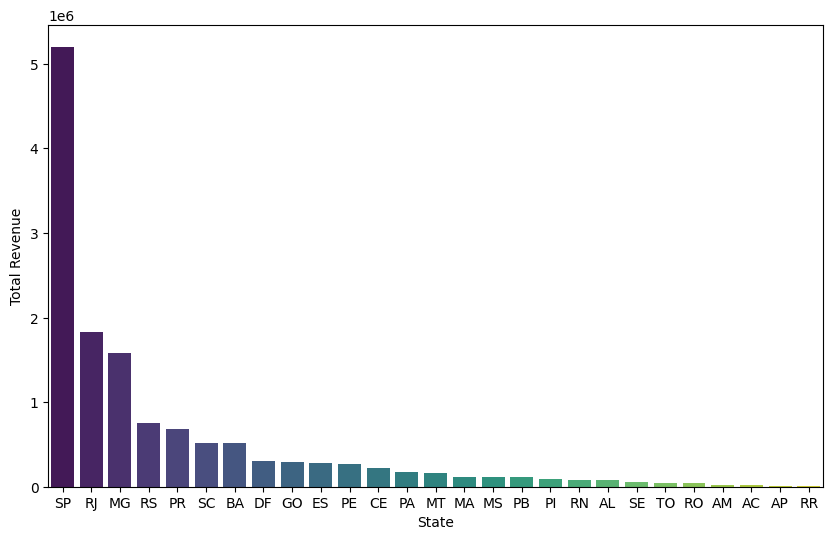

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Total Revenue', data=df,palette = 'viridis')
plt.xlabel('State')
plt.ylabel('Total Revenue')

# **Query 6: Top Successful Sellers (by units sold, revenue, customers, and 5-star reviews)**

In [102]:
c.execute('''SELECT
  i.seller_id,
  COUNT(i.order_id) AS total_items_sold,
  ROUND(SUM(i.price), 2) AS total_revenue,
  COUNT(DISTINCT o.customer_id) AS unique_customers,
  SUM(CASE WHEN r.review_score = 5 THEN 1 ELSE 0 END) AS five_star_reviews
FROM olist_order_items_dataset i
JOIN olist_orders_dataset o ON i.order_id = o.order_id
JOIN olist_order_reviews_dataset r ON o.order_id = r.order_id
GROUP BY i.seller_id
ORDER BY total_items_sold DESC
LIMIT 5;''')

df = pd.DataFrame(c.fetchall(), columns=['Seller ID', 'Total Items Sold', 'Total Revenue', 'Unique Customers', '5-Star Reviews'])
display(df)

,Seller ID,Total Items Sold,Total Revenue,Unique Customers,5-Star Reviews
0,6560211a19b47992c3666cc44a7e94c0,2020,122484.82,1838,1024
1,4a3ca9315b744ce9f8e9374361493884,1984,200561.42,1785,947
2,1f50f920176fa81dab994f9023523100,1932,107002.21,1399,1096
3,cc419e0650a3c5ba77189a1882b7556a,1811,106059.06,1698,1053
4,da8622b14eb17ae2831f4ac5b9dab84a,1568,161993.97,1308,893


# **Query 7: Category-wise Order Volume and Revenue**

In [141]:
c.execute('''SELECT
p.product_category_name,
COUNT(i.order_id) AS order_count,
ROUND(SUM(i.price), 2) AS total_revenue
FROM olist_order_items_dataset i
JOIN olist_products_dataset p ON i.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY total_revenue DESC
LIMIT 10;''')

df = pd.DataFrame(c.fetchall(), columns=['Category', 'Order Count', 'Total Revenue'])
display(df)

,Category,Order Count,Total Revenue
0,beleza_saude,9670,1258681.34
1,relogios_presentes,5991,1205005.68
2,cama_mesa_banho,11115,1036988.68
3,esporte_lazer,8641,988048.97
4,informatica_acessorios,7827,911954.32
5,moveis_decoracao,8334,729762.49
6,cool_stuff,3796,635290.85
7,utilidades_domesticas,6964,632248.66
8,automotivo,4235,592720.11
9,ferramentas_jardim,4347,485256.46


Text(0, 0.5, 'Total Revenue')

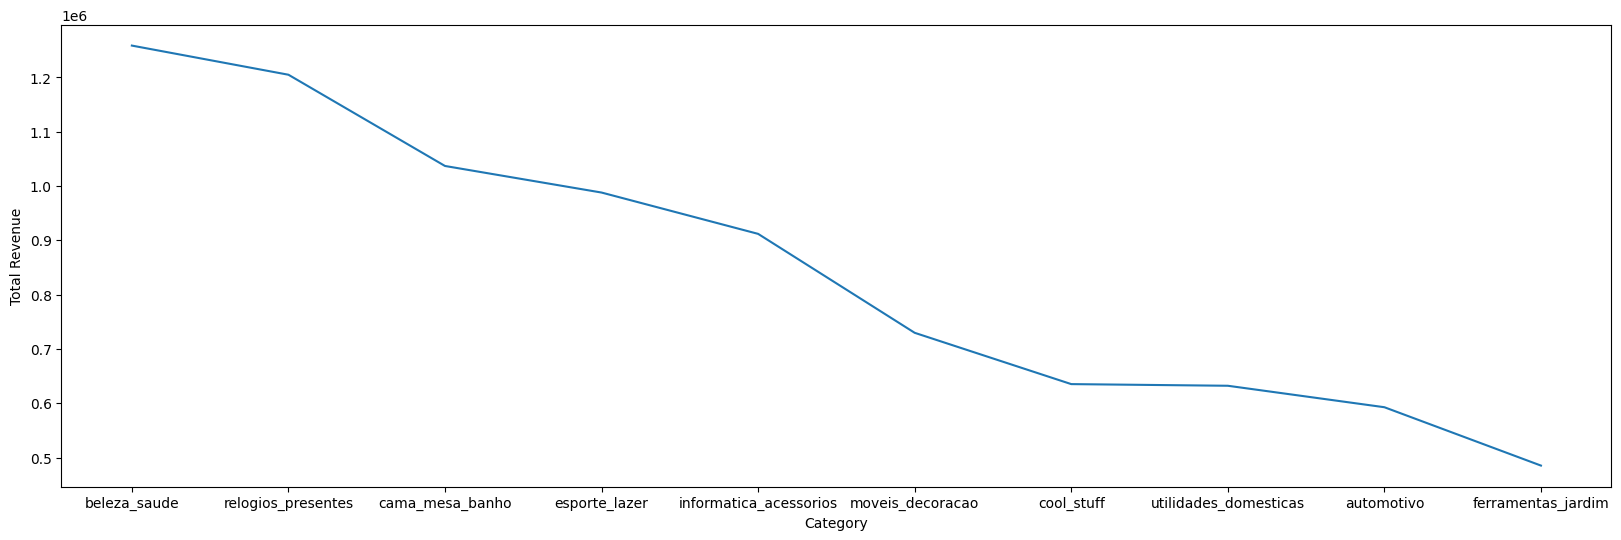

In [144]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Category', y='Total Revenue', data=df)
plt.xlabel('Category')
plt.ylabel('Total Revenue')

# **Query 8: % of Orders Delivered Late vs On-Time**

In [109]:
c.execute('''SELECT
  CASE
    WHEN julianday(order_delivered_customer_date) > julianday(order_estimated_delivery_date) THEN 'Late'
    ELSE 'On-Time'
  END AS delivery_status,
  COUNT(*) AS order_count,
  ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM olist_orders_dataset WHERE order_delivered_customer_date IS NOT NULL), 2) AS percentage
FROM olist_orders_dataset
WHERE order_delivered_customer_date IS NOT NULL
GROUP BY delivery_status;
''')
df = pd.DataFrame(c.fetchall(), columns=['Delivery Status', 'Order Count', 'Percentage'])
display(df)

,Delivery Status,Order Count,Percentage
0,Late,7827,8.11
1,On-Time,88649,91.89


# **Query 9: Distribution of Review Scores**

In [111]:
c.execute('''SELECT
  review_score,
  COUNT(*) AS total_reviews,
  ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM olist_order_reviews_dataset), 2) AS percentage
FROM olist_order_reviews_dataset
GROUP BY review_score
ORDER BY review_score DESC;
''')
df = pd.DataFrame(c.fetchall(), columns=['Review Score', 'Total Reviews', 'Percentage'])
display(df)

,Review Score,Total Reviews,Percentage
0,5,57328,57.78
1,4,19142,19.29
2,3,8179,8.24
3,2,3151,3.18
4,1,11424,11.51


# **Query 10: Average Review Score by Product Category**

In [158]:
c.execute('''SELECT
  p.product_category_name,
  ROUND(AVG(r.review_score), 2) AS avg_review_score
FROM olist_order_items_dataset i
JOIN olist_products_dataset p ON i.product_id = p.product_id
JOIN olist_orders_dataset o ON o.order_id = i.order_id
JOIN olist_order_reviews_dataset r ON r.order_id = o.order_id
GROUP BY p.product_category_name
ORDER BY avg_review_score DESC
LIMIT 10;''')

df = pd.DataFrame(c.fetchall(), columns=['Category', 'Average Review Score'])
display(df)

,Category,Average Review Score
0,cds_dvds_musicais,4.64
1,fashion_roupa_infanto_juvenil,4.50
2,livros_interesse_geral,4.45
3,construcao_ferramentas_ferramentas,4.44
4,flores,4.42
5,livros_importados,4.40
6,livros_tecnicos,4.37
7,malas_acessorios,4.32
8,alimentos_bebidas,4.32
9,portateis_casa_forno_e_cafe,4.30


(4.0, 5.0)

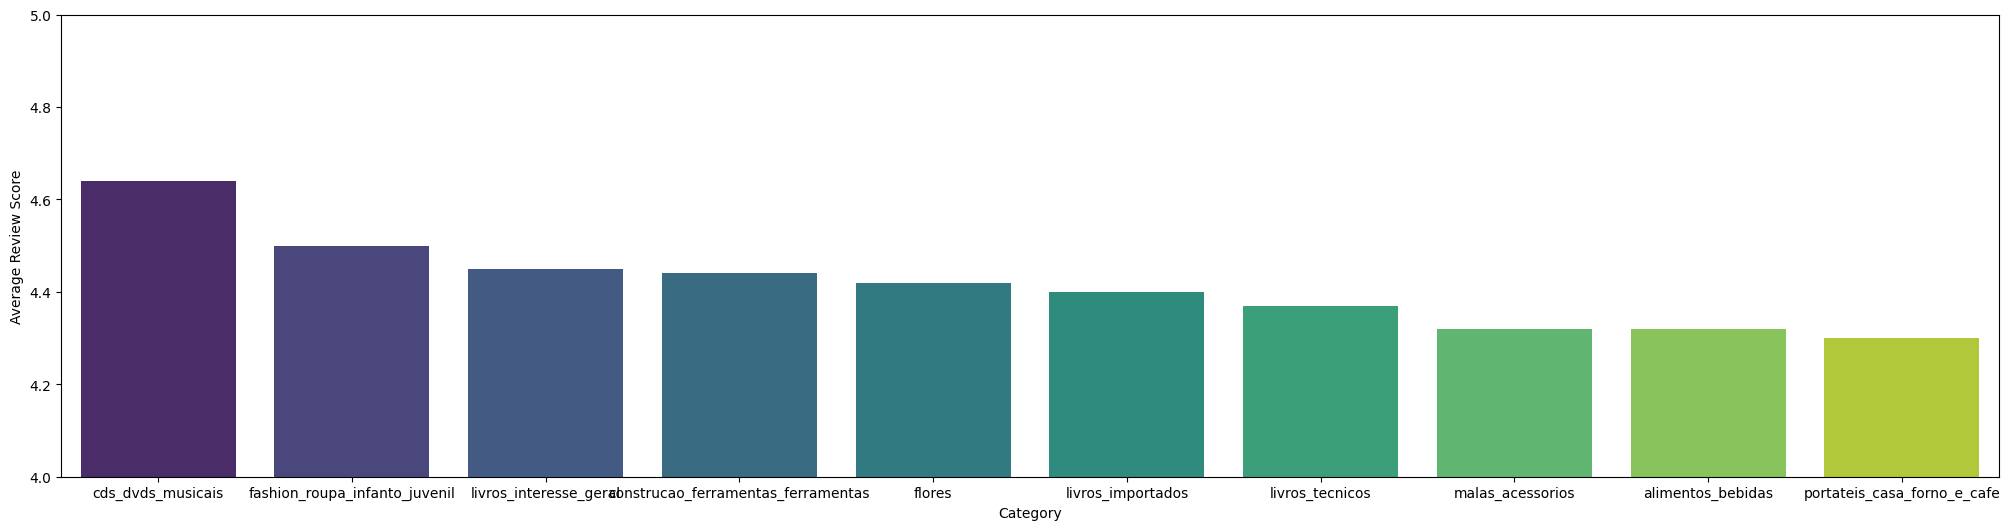

In [159]:
plt.figure(figsize=(25, 6))
sns.barplot(x='Category', y='Average Review Score', data=df,palette = 'viridis')
plt.xlabel('Category')
plt.ylabel('Average Review Score')
plt.ylim(4, 5)

# **Query 11: Top 5 Monthly Active Customers (MAC)**

In [133]:
c.execute('''
SELECT
year_month,
customer_id,
order_count
FROM (SELECT
  strftime('%Y-%m', o.order_purchase_timestamp) AS year_month,
  o.customer_id,
  COUNT(DISTINCT o.order_id) AS order_count,RANK() OVER (ORDER BY COUNT(DISTINCT o.order_id) DESC) AS RNK
FROM olist_orders_dataset o
GROUP BY year_month)x
WHERE x.RNK<6;''')
df = pd.DataFrame(c.fetchall(), columns=['Year-Month', 'Customer ID', 'Order Count'])
display(df)

,Year-Month,Customer ID,Order Count
0,2017-11,f88197465ea7920adcdbec7375364d82,7544
1,2018-01,738b086814c6fcc74b8cc583f8516ee3,7269
2,2018-03,3df704f53d3f1d4818840b34ec672a9f,7211
3,2018-04,52142aa69d8d0e1247ab0cada0f76023,6939
4,2018-05,cce89a605105b148387c52e286ac8335,6873


# **Query 12: Seller Fulfillment Speed (Avg Days to Ship)**

In [125]:
c.execute('''
SELECT
  seller_id,
  ROUND(AVG(julianday(shipping_limit_date) - julianday(order_approved_at)), 2) AS avg_fulfillment_days
FROM olist_order_items_dataset i
JOIN olist_orders_dataset o ON i.order_id = o.order_id
GROUP BY seller_id
ORDER BY avg_fulfillment_days
LIMIT 10;''')
df = pd.DataFrame(c.fetchall(), columns=['Seller ID', 'Average Fulfillment Days'])
display(df)

,Seller ID,Average Fulfillment Days
0,96e5dc09087bad639b4ee193104ec2e5,0.05
1,2bdb95a56a36ebbc6640337ac5eac174,0.73
2,b5d034ac251546e25afe9067f05c1539,1.46
3,4965a7002cca77301c82d3f91b82e1a9,1.65
4,cad10cc982ab6a391570c211b995c17c,1.80
5,0daf5180aa44356f60f8effa533b55a2,1.94
6,392f7f2c797e4dc077e4311bde2ab8ce,2.00
7,466222e777149751370e7e98fb623b0c,2.00
8,7d81e74a4755b552267cd5e081563028,2.00
9,ea846a0e7ad98a741783e886d89dfa44,2.00


# **Conclusion**

Through this exploratory data analysis using SQL, we derived key insights such as:
- Seasonal purchasing trends
- High percentage of positive (5-star) reviews
- Popular product categories
- Top-performing sellers
- Average order values across months

This project demonstrates the power of combining SQL and Python for scalable data analysis.
